In [1]:
import pandas as pd
import seaborn as sns

df = pd.read_excel(r'C:\Users\ebloom\Desktop\FossilFuelSubsidiesTracker.xlsx', sheet_name='fulldata',
                  na_values=["0.00", ".."])
df = df[df['Year'] == 2019]
df = df.groupby(['Country']).sum()
df = df.drop(columns={'Year'})
df['% share of GDP'] = df['% share of GDP'] * 100
df = df.round(2)
df


,% share of GDP,USD nominal per Capita
Country,,
Algeria,7.72,304.63
Angola,1.13,33.55
Argentina,1.15,115.00
Armenia,0.03,1.60
Australia,0.52,284.86
...,...,...
United Kingdom,0.54,228.02
United States,0.04,24.94
Uzbekistan,7.63,134.07


# Analysis

<AxesSubplot:ylabel='Country'>

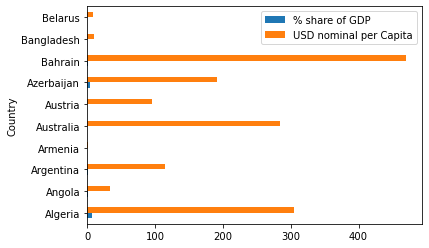

In [2]:
df[:10].plot(kind='barh')

<AxesSubplot:xlabel='% share of GDP', ylabel='Country'>

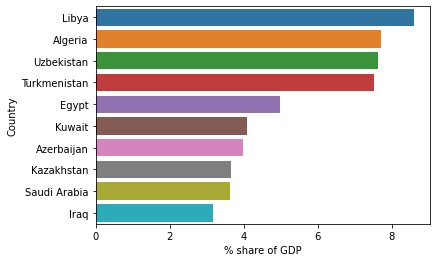

In [3]:
df = df.sort_values(by='% share of GDP', ascending=False)
top_subsidiser = df[:10]
sns.barplot(x=top_subsidiser["% share of GDP"], y=top_subsidiser.index)

<AxesSubplot:xlabel='% share of GDP', ylabel='Country'>

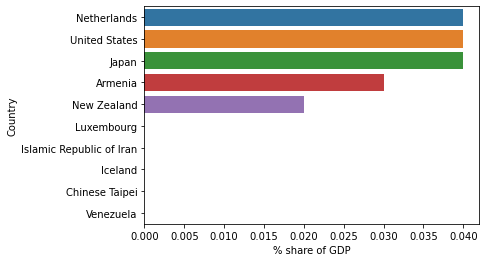

In [4]:
bottom_subsidiser = df[-10:]
sns.barplot(x=bottom_subsidiser["% share of GDP"], y=bottom_subsidiser.index)
## 0s don't always make sense - mark as NA?

In [5]:
df.loc[df["% share of GDP"] == 0]

,% share of GDP,USD nominal per Capita
Country,,
Luxembourg,0.0,3.64
Islamic Republic of Iran,0.0,1038.37
Iceland,0.0,0.00
Chinese Taipei,0.0,0.13
Venezuela,0.0,448.04


<AxesSubplot:xlabel='USD nominal per Capita', ylabel='Country'>

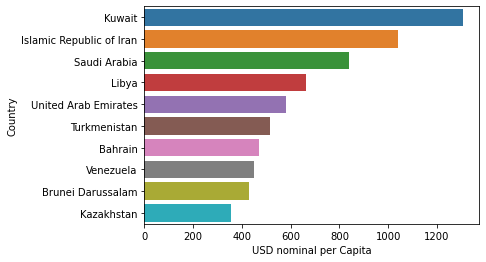

In [6]:
df2 = df.sort_values(by='USD nominal per Capita', ascending=False)
top_subsidiser = df2[:10]
sns.barplot(x=top_subsidiser["USD nominal per Capita"], y=top_subsidiser.index)

<AxesSubplot:xlabel='USD nominal per Capita', ylabel='Country'>

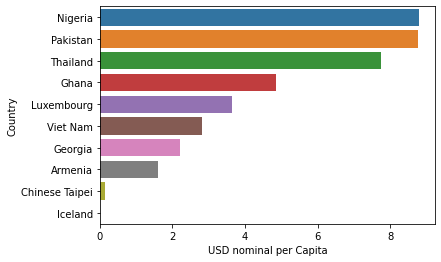

In [7]:
bottom_subsidiser = df2[-10:]
sns.barplot(x=bottom_subsidiser["USD nominal per Capita"], y=bottom_subsidiser.index)

In [8]:
print(df.describe())

       % share of GDP  USD nominal per Capita
count       81.000000               81.000000
mean         1.169136              159.849012
std          1.871445              231.903808
min          0.000000                0.000000
25%          0.140000               24.940000
50%          0.460000               63.720000
75%          1.230000              180.310000
max          8.610000             1308.080000


<AxesSubplot:>

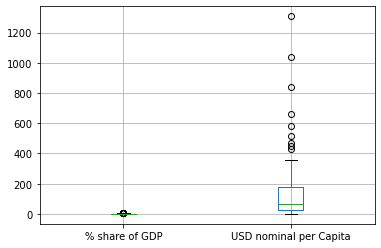

In [9]:
df.boxplot()
##many outliers per capita

array([[<AxesSubplot:title={'center':'% share of GDP'}>,
        <AxesSubplot:title={'center':'USD nominal per Capita'}>]],
      dtype=object)

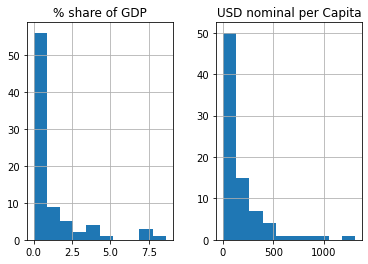

In [10]:
df.hist()
#mostly around lower end

array([[<AxesSubplot:xlabel='% share of GDP', ylabel='% share of GDP'>,
        <AxesSubplot:xlabel='USD nominal per Capita', ylabel='% share of GDP'>],
       [<AxesSubplot:xlabel='% share of GDP', ylabel='USD nominal per Capita'>,
        <AxesSubplot:xlabel='USD nominal per Capita', ylabel='USD nominal per Capita'>]],
      dtype=object)

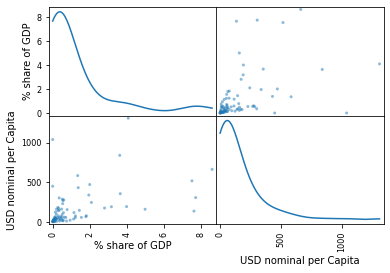

In [11]:
from pandas.plotting import scatter_matrix

scatter_matrix(df, alpha=0.5, diagonal='kde')

# GRO data import

In [12]:
GRO = pd.read_excel('https://recovery.smithschool.ox.ac.uk/wp-content/uploads/2021/05/20210524-Global-Recovery-Observatory-publicv2.xlsx', sheet_name="COVID-19 Measures",
                  na_values=[".."], usecols={'Country', 'Total Value, USD (billions)', 'Clean archetype?', 'Recovery?'})
index = GRO[GRO['Recovery?'] != 1].index
rec = GRO.drop(index, inplace=False)
rec = rec.groupby(["Country"], as_index=False).sum()
rec = rec.drop(columns=['Recovery?', 'Clean archetype?'])

index2 = GRO[GRO['Clean archetype?'] != 1].index
greenrec = GRO.drop(index2, inplace=False)
index = greenrec[greenrec['Recovery?'] != 1].index
greenrec.drop(index, inplace=True)
greenrec = greenrec.groupby(["Country"], as_index=False).sum()
greenrec = greenrec.drop(columns=['Recovery?', 'Clean archetype?'])

In [13]:
merge = greenrec.merge(rec, how='left', left_on='Country', right_on='Country')
merge['Percent'] = (merge['Total Value, USD (billions)_x'] / merge['Total Value, USD (billions)_y']) * 100
merge.rename(columns = {"Total Value, USD (billions)_x" : "Green recovery spending", "Total Value, USD (billions)_y" : "Recovery spending"}, inplace=True)
merge = merge.round({"Percent" : 2})
merge

,Country,Green recovery spending,Recovery spending,Percent
0,Argentina,0.00,6.82,0.00
1,Australia,2.30,130.95,1.76
2,Austria,0.38,1.60,23.75
3,Bangladesh,0.55,0.63,87.30
4,Brazil,0.28,0.54,51.85
5,Burkina Faso,0.00,0.00,NaN
6,Canada,21.67,38.70,55.99
7,Chile,0.45,3.13,14.38
8,China,51.88,427.52,12.14
9,Colombia,0.15,0.32,46.88


In [14]:
GROmerge = merge.merge(df, how='left', left_on='Country', right_on='Country')
GROmerge

,Country,Green recovery spending,Recovery spending,Percent,% share of GDP,USD nominal per Capita
0,Argentina,0.00,6.82,0.00,1.15,115.00
1,Australia,2.30,130.95,1.76,0.52,284.86
2,Austria,0.38,1.60,23.75,0.19,95.99
3,Bangladesh,0.55,0.63,87.30,0.56,10.37
4,Brazil,0.28,0.54,51.85,0.46,40.21
5,Burkina Faso,0.00,0.00,NaN,NaN,NaN
6,Canada,21.67,38.70,55.99,0.13,60.34
7,Chile,0.45,3.13,14.38,0.43,64.12
8,China,51.88,427.52,12.14,NaN,NaN
9,Colombia,0.15,0.32,46.88,0.41,26.58


array([[<AxesSubplot:xlabel='Green recovery spending', ylabel='Green recovery spending'>,
        <AxesSubplot:xlabel='Recovery spending', ylabel='Green recovery spending'>,
        <AxesSubplot:xlabel='Percent', ylabel='Green recovery spending'>,
        <AxesSubplot:xlabel='% share of GDP', ylabel='Green recovery spending'>,
        <AxesSubplot:xlabel='USD nominal per Capita', ylabel='Green recovery spending'>],
       [<AxesSubplot:xlabel='Green recovery spending', ylabel='Recovery spending'>,
        <AxesSubplot:xlabel='Recovery spending', ylabel='Recovery spending'>,
        <AxesSubplot:xlabel='Percent', ylabel='Recovery spending'>,
        <AxesSubplot:xlabel='% share of GDP', ylabel='Recovery spending'>,
        <AxesSubplot:xlabel='USD nominal per Capita', ylabel='Recovery spending'>],
       [<AxesSubplot:xlabel='Green recovery spending', ylabel='Percent'>,
        <AxesSubplot:xlabel='Recovery spending', ylabel='Percent'>,
        <AxesSubplot:xlabel='Percent', ylabel='Per

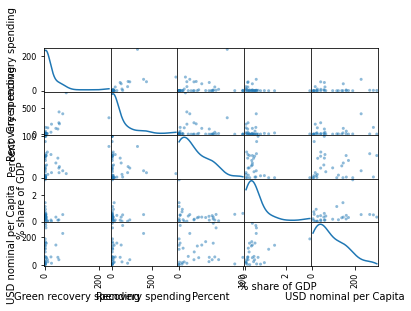

In [16]:
scatter_matrix(GROmerge, alpha=0.5, diagonal='kde')
##some not a numbers even when country is in IISD dataset - country spelled differently